/var/folders/01/_bgw0fxs5rv8ysw_gs46q0v40000gn/T/ipykernel_3304/766317377.py:64: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result_row], ignore_index=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030199 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2124
[LightGBM] [Info] Number of data points in the train set: 18319, number of used features: 624
[LightGBM] [Info] Start training from score 39.972026
               Model      MAPE
0      Random Forest  0.059992
1  Gradient Boosting  0.309044
2        Elastic Net  0.349177
3                SVR  0.231450
4     Neural Network  0.102697
5                KNN  0.139088
6            xGBoost  0.172453
7           CatBoost  0.181792
8           LightGBM  0.195789


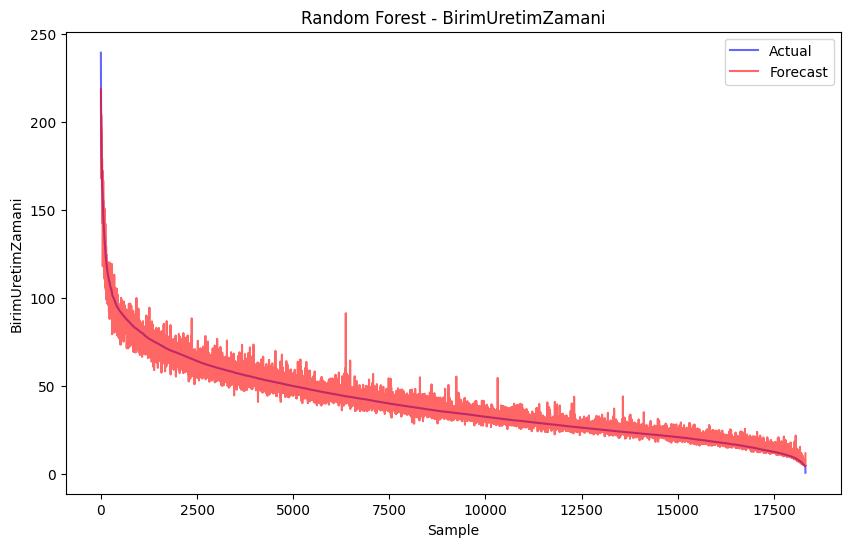

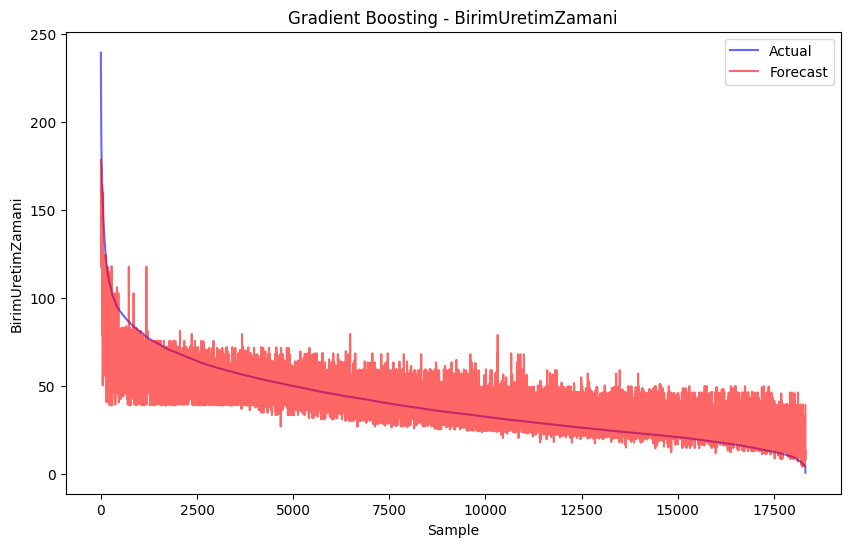

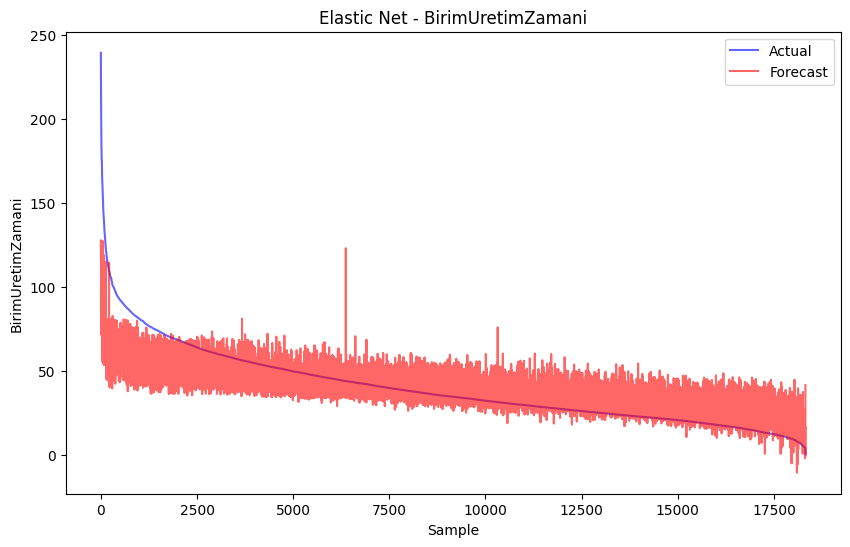

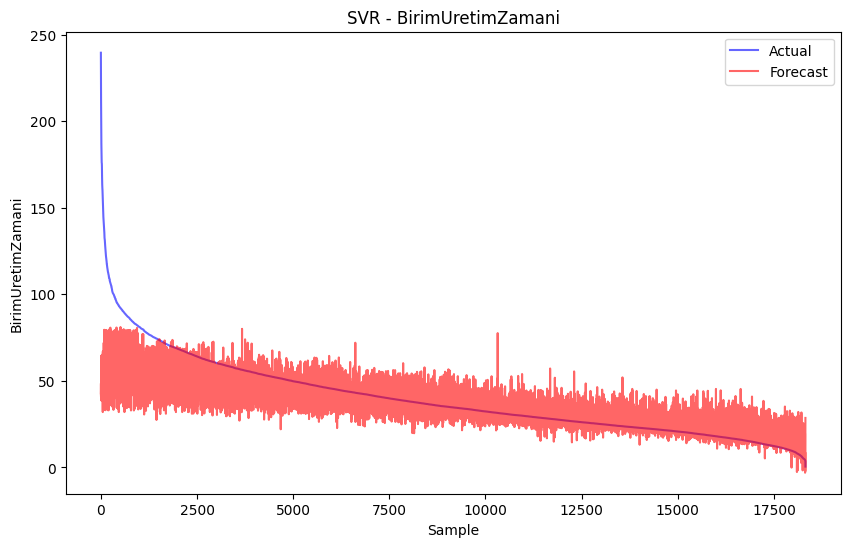

/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


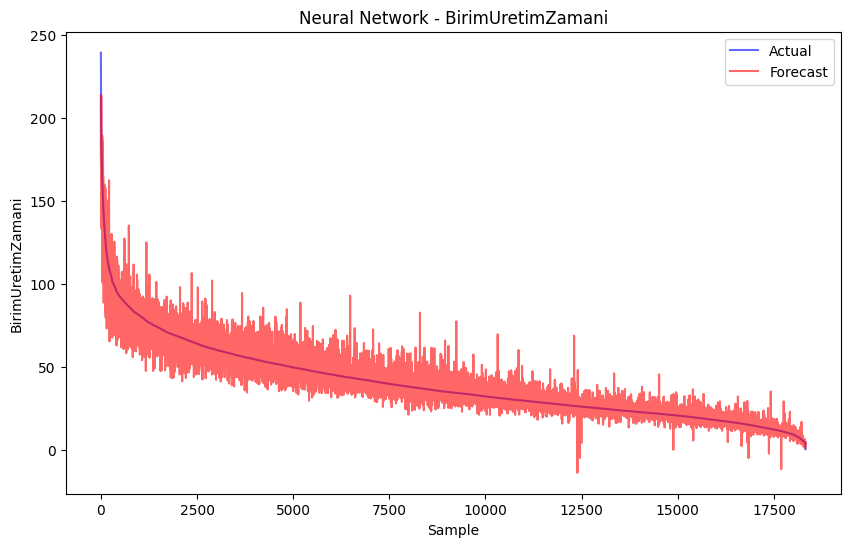

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error
import xgboost as xgb
import catboost as cb
import lightgbm as lgb
import matplotlib.pyplot as plt

# Veriyi yükleyelim
data_path = 'birim_uretim_zamani_duzenlenmis.csv'
data = pd.read_csv(data_path)

# Özellik ve hedef değişkenleri belirleme
# Uretim, Etut, BirimUretimZamani dışındaki kolonlar kategorik kabul ediliyor
X = data[['UretimID', 'ModelAdi', 'PersonelNo', 'ModelTipAdi', 'OperAdi', 'MakinaTipi', 'Uretim']]
y = data['BirimUretimZamani']  # Hedef değişken

# Kategorik değişkenleri sayısallaştırma (One-hot encoding)
# Uretim ve Etut dışındaki tüm kolonlar için one-hot encoding uyguluyoruz
X = pd.get_dummies(X, columns=['UretimID', 'ModelAdi', 'PersonelNo', 'ModelTipAdi', 'OperAdi', 'MakinaTipi'])

# Veriyi ölçeklendirme (Sadece sayısal özellikleri ölçeklendirelim)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Modelleri tanımlayalım
models = {
    'Random Forest': RandomForestRegressor(random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Elastic Net': ElasticNet(random_state=42),
    'SVR': SVR(),
    'Neural Network': MLPRegressor(random_state=42, max_iter=1000),
    'KNN': KNeighborsRegressor(n_jobs=-1),
    'xGBoost': xgb.XGBRegressor(random_state=42, n_jobs=-1),
    'CatBoost': cb.CatBoostRegressor(random_state=42, silent=True),
    'LightGBM': lgb.LGBMRegressor(random_state=42, n_jobs=-1)
}

# Her model için sonuçları tutmak için boş bir DataFrame
results = pd.DataFrame(columns=['Model', 'MAPE'])

# Tüm modelleri eğitip değerlendiriyoruz
for model_name, model in models.items():
    # Modeli eğit
    model.fit(X_scaled, y)
    
    # Tahmin yap
    y_pred = model.predict(X_scaled)
    
    # MAPE hesaplayalım
    mape = mean_absolute_percentage_error(y, y_pred)
    
    # Sonuçları bir DataFrame olarak oluşturup sonuçlar DataFrame'ine ekleyelim
    result_row = pd.DataFrame({
        'Model': [model_name],
        'MAPE': [mape]
    })
    results = pd.concat([results, result_row], ignore_index=True)

# Sonuçların tablo olarak gösterilmesi
print(results)

# Tüm veriyi kullanarak modelleri eğitip tahminleri yapalım ve grafikleri çizelim
for model_name, model in models.items():
    # Modeli eğit
    model.fit(X_scaled, y)
    
    # Tahmin yap
    y_pred = model.predict(X_scaled)
    
    # Gerçek ve tahmin edilen değerleri çiz
    plt.figure(figsize=(10, 6))
    plt.plot(y.values, label='Actual', color='blue', alpha=0.6)
    plt.plot(y_pred, label='Forecast', color='red', alpha=0.6)
    
    # Grafiğin başlık ve etiketleri
    plt.title(f'{model_name} - BirimUretimZamani')
    plt.xlabel('Sample')
    plt.ylabel('BirimUretimZamani')
    plt.legend()
    plt.show()

In [ ]:
#Aşağıdaki tüm grafik sonuçlarını elde etmek için güncellenen son kod.

Training Random Forest...
Random Forest MAPE: 0.05999151137597542


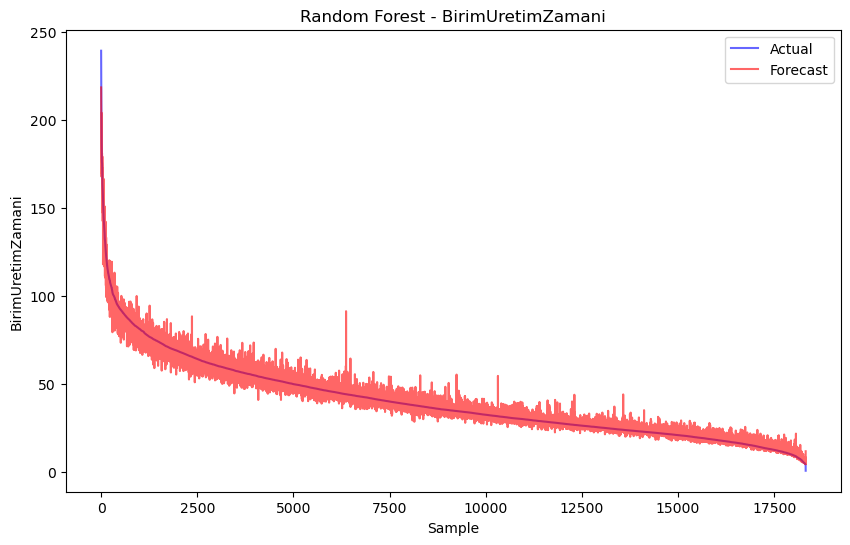

Training Gradient Boosting...
Gradient Boosting MAPE: 0.3090442486476691


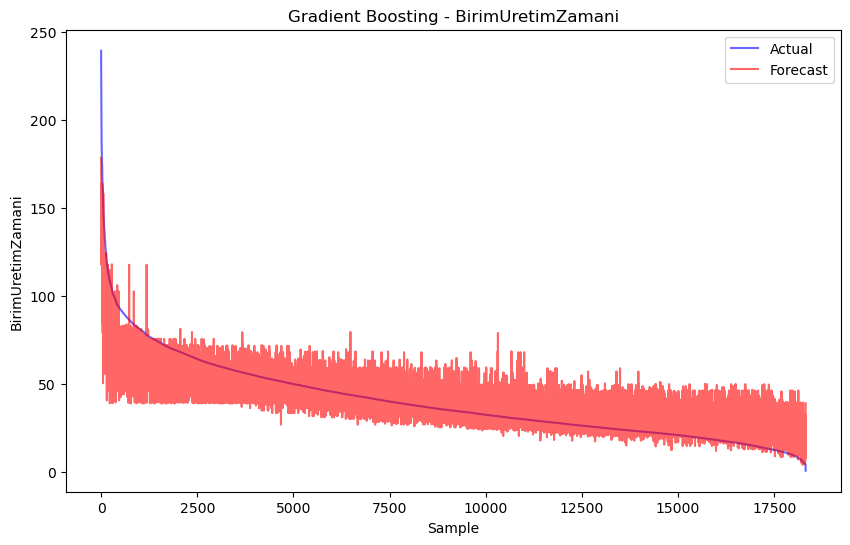

Training Elastic Net...
Elastic Net MAPE: 0.34917715664768223


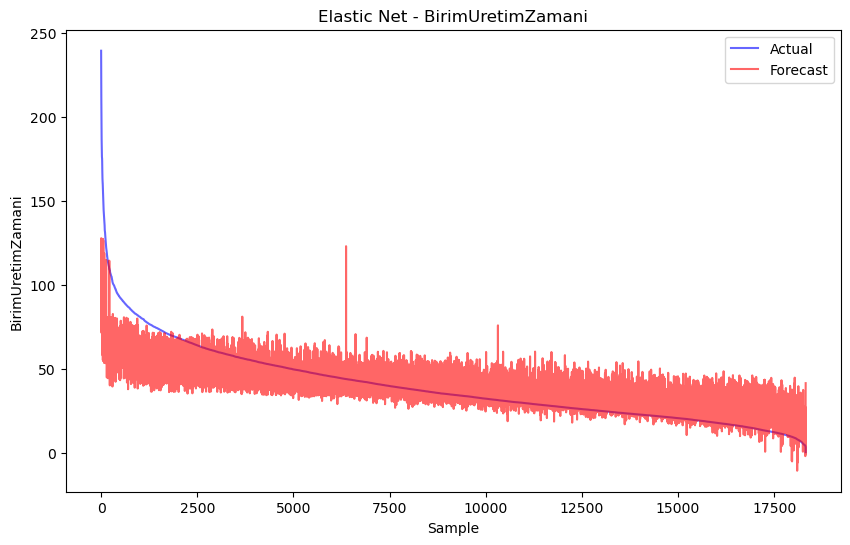

Training SVR...
SVR MAPE: 0.23144962476758996


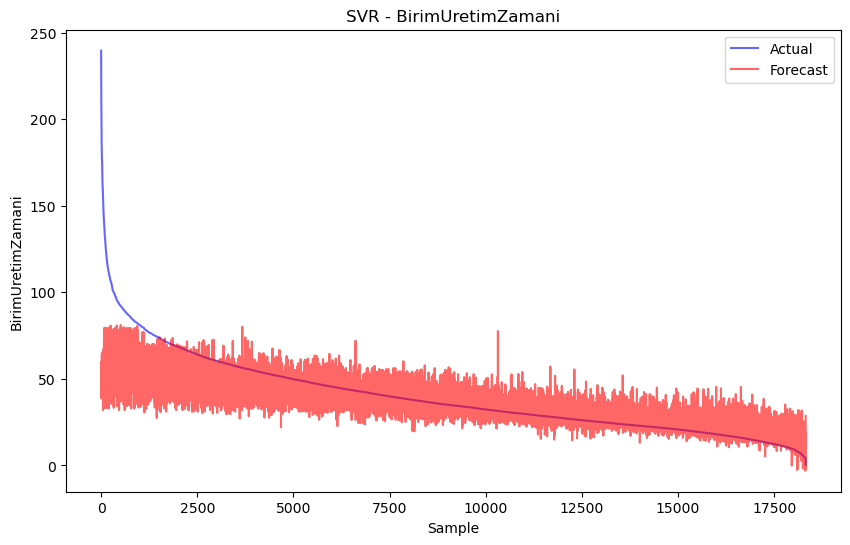

Training Neural Network...
Neural Network MAPE: 0.10269682769518236


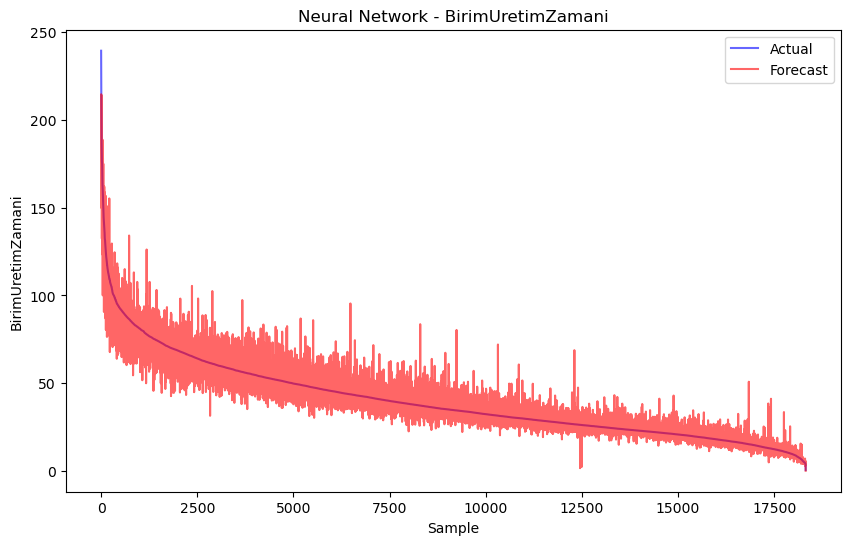

Training KNN...
KNN MAPE: 0.13907185743790518


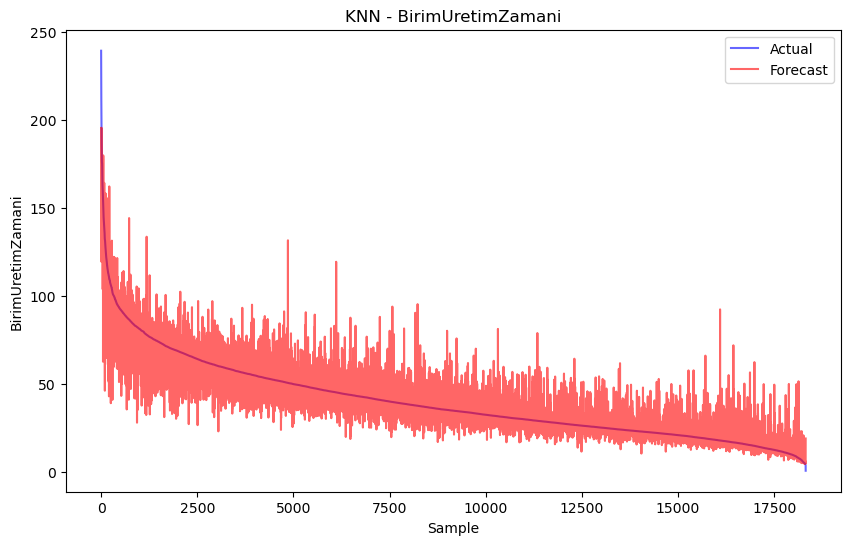

Training xGBoost...
xGBoost MAPE: 0.17245328459087347


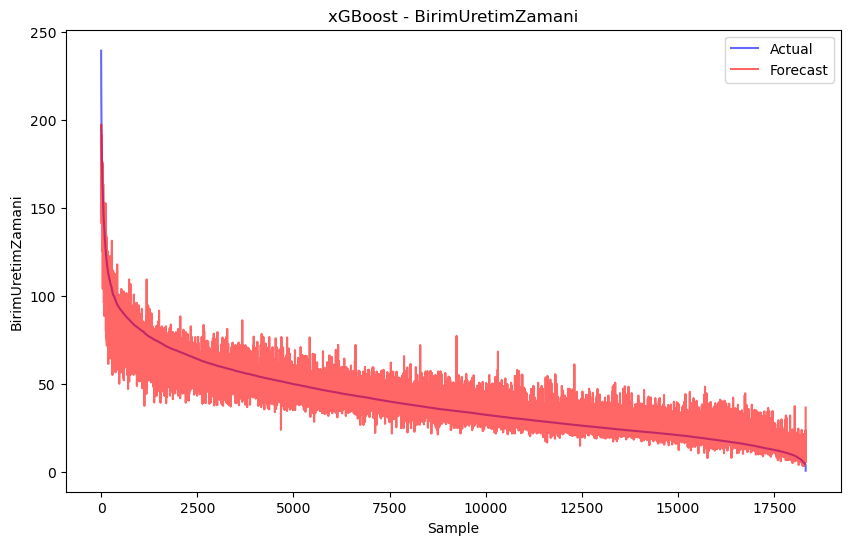

Training CatBoost...
CatBoost MAPE: 0.18179208646139505


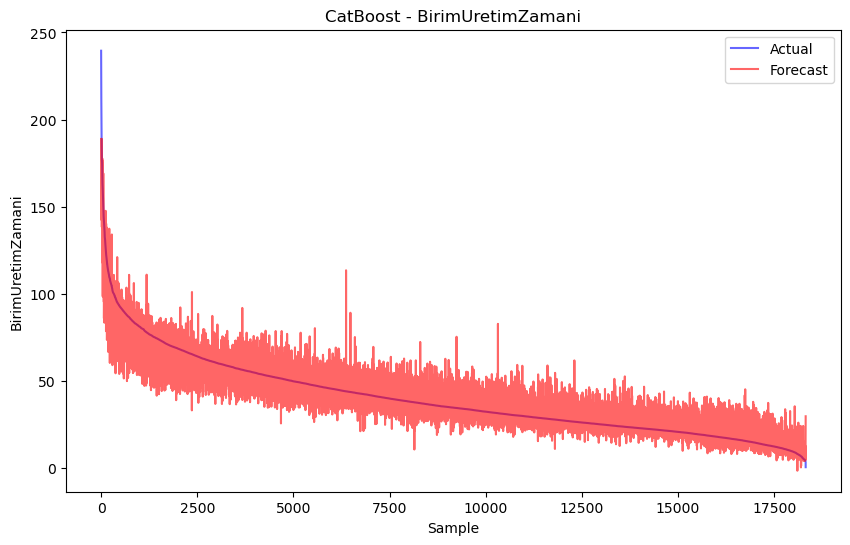

Training LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023304 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2124
[LightGBM] [Info] Number of data points in the train set: 18319, number of used features: 624
[LightGBM] [Info] Start training from score 39.972026
LightGBM MAPE: 0.1957885967082442


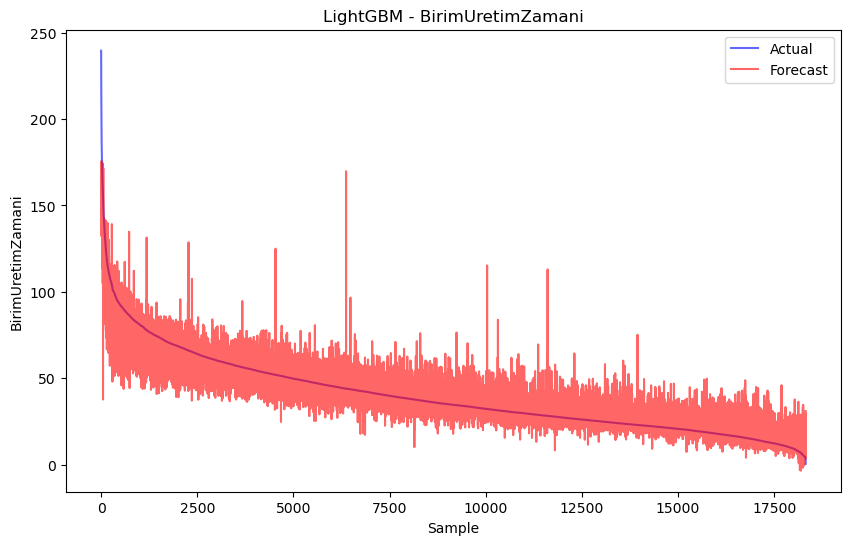

               Model      MAPE
0      Random Forest  0.059992
1  Gradient Boosting  0.309044
2        Elastic Net  0.349177
3                SVR  0.231450
4     Neural Network  0.102697
5                KNN  0.139072
6            xGBoost  0.172453
7           CatBoost  0.181792
8           LightGBM  0.195789


In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error
import xgboost as xgb
import catboost as cb
import lightgbm as lgb
import matplotlib.pyplot as plt

# Veriyi yükleyelim
data_path = 'birim_uretim_zamani_duzenlenmis.csv'
data = pd.read_csv(data_path)

# Özellik ve hedef değişkenleri belirleme
X = data[['UretimID', 'ModelAdi', 'PersonelNo', 'ModelTipAdi', 'OperAdi', 'MakinaTipi', 'Uretim']]
y = data['BirimUretimZamani']  # Hedef değişken

# Kategorik değişkenleri sayısallaştırma (One-hot encoding)
X = pd.get_dummies(X, columns=['UretimID', 'ModelAdi', 'PersonelNo', 'ModelTipAdi', 'OperAdi', 'MakinaTipi'])

# Veriyi ölçeklendirme (Sadece sayısal özellikleri ölçeklendirelim)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Modelleri tanımlayalım
models = {
    'Random Forest': RandomForestRegressor(random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Elastic Net': ElasticNet(random_state=42),
    'SVR': SVR(),
    'Neural Network': MLPRegressor(random_state=42, max_iter=1000),
    'KNN': KNeighborsRegressor(n_jobs=-1),
    'xGBoost': xgb.XGBRegressor(random_state=42, n_jobs=-1),
    'CatBoost': cb.CatBoostRegressor(random_state=42, silent=True),
    'LightGBM': lgb.LGBMRegressor(random_state=42, n_jobs=-1)
}

# Her model için sonuçları tutmak için boş bir DataFrame
results = pd.DataFrame(columns=['Model', 'MAPE'])

# Modelleri eğitip tahmin yapalım ve grafiklerini oluşturalım
for model_name, model in models.items():
    try:
        # Modeli eğit
        print(f"Training {model_name}...")
        model.fit(X_scaled, y)

        # Tahmin yap
        y_pred = model.predict(X_scaled)

        # MAPE hesaplayalım
        mape = mean_absolute_percentage_error(y, y_pred)
        print(f'{model_name} MAPE: {mape}')

        # Sonuçları kaydet
        results = pd.concat([results, pd.DataFrame({'Model': [model_name], 'MAPE': [mape]})], ignore_index=True)

        # Gerçek ve tahmin edilen değerleri çiz
        plt.figure(figsize=(10, 6))
        plt.plot(y.values, label='Actual', color='blue', alpha=0.6)
        plt.plot(y_pred, label='Forecast', color='red', alpha=0.6)

        # Grafiğin başlık ve etiketleri
        plt.title(f'{model_name} - BirimUretimZamani')
        plt.xlabel('Sample')
        plt.ylabel('BirimUretimZamani')
        plt.legend()
        plt.show()  # Grafiği göster
        plt.close()  # Belleği temizlemek için grafiği kapat
    except Exception as e:
        print(f"An error occurred with model {model_name}: {e}")

# Sonuçları tablo olarak gösterelim
print(results)

/var/folders/01/_bgw0fxs5rv8ysw_gs46q0v40000gn/T/ipykernel_3719/1602649578.py:64: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result_row], ignore_index=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032440 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 18319, number of used features: 625
[LightGBM] [Info] Start training from score 39.972026
               Model      MAPE
0      Random Forest  0.050654
1  Gradient Boosting  0.155848
2        Elastic Net  0.249986
3                SVR  0.201192
4     Neural Network  0.096325
5                KNN  0.137048
6            xGBoost  0.123281
7           CatBoost  0.132365
8           LightGBM  0.136237


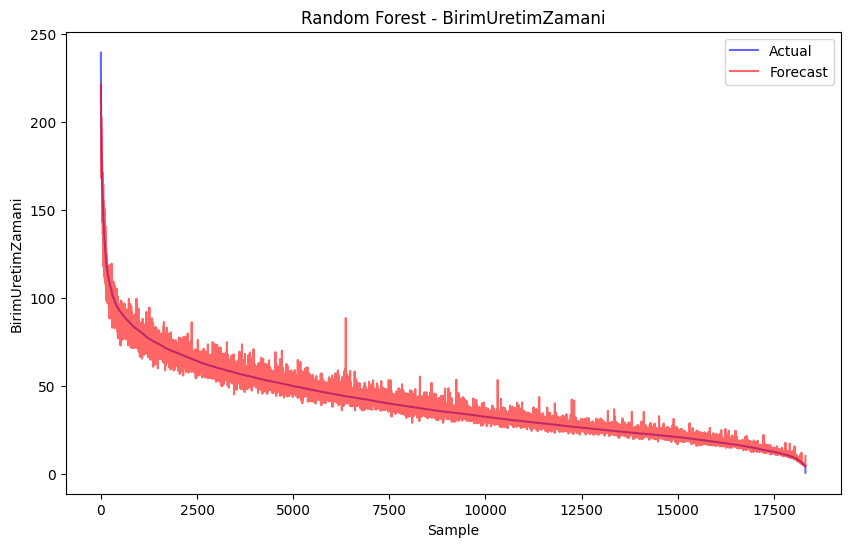

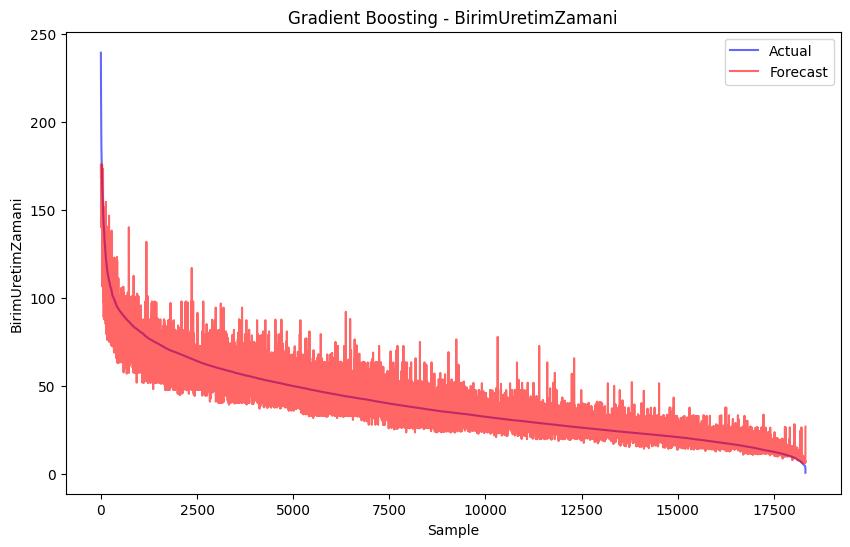

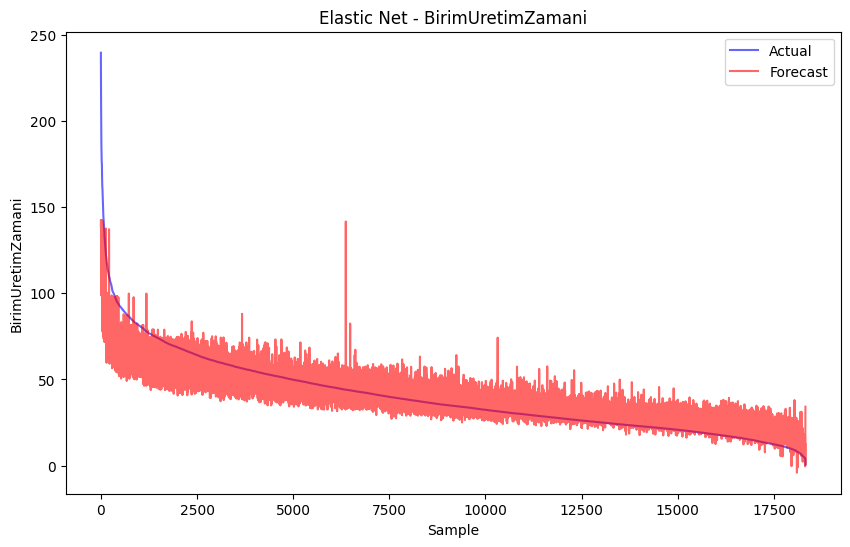

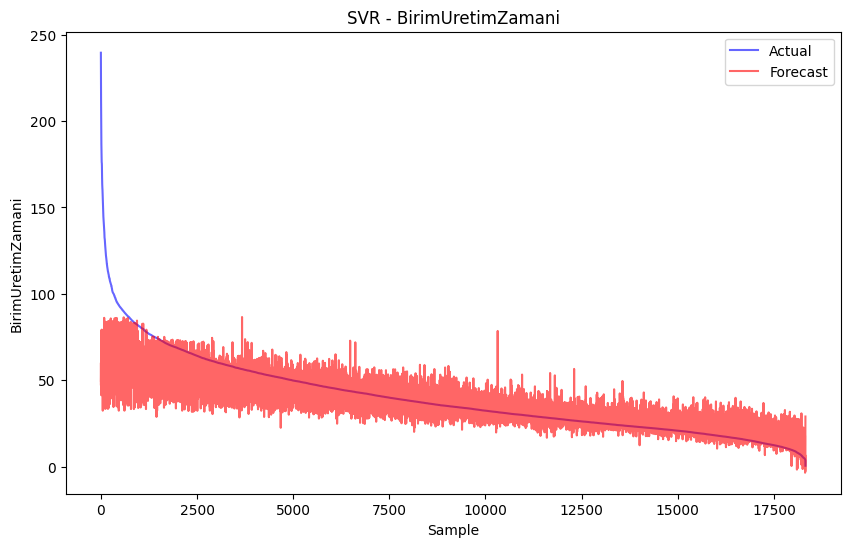

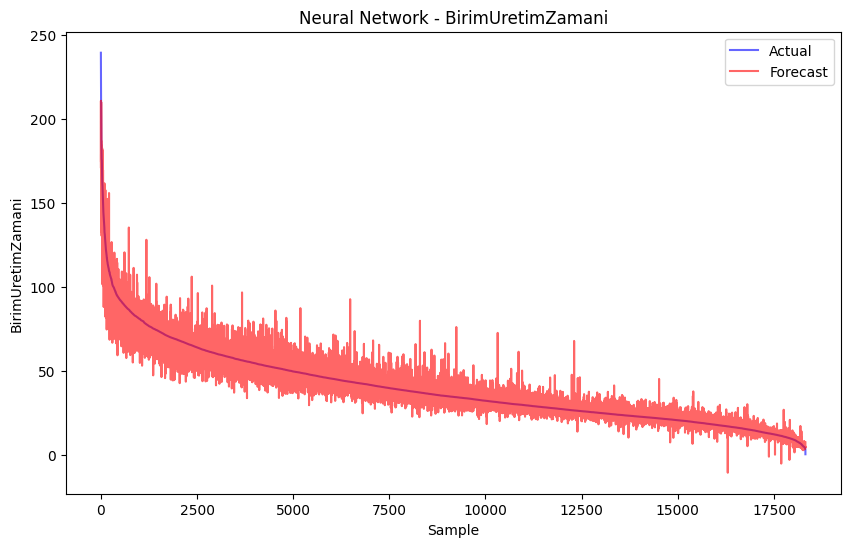

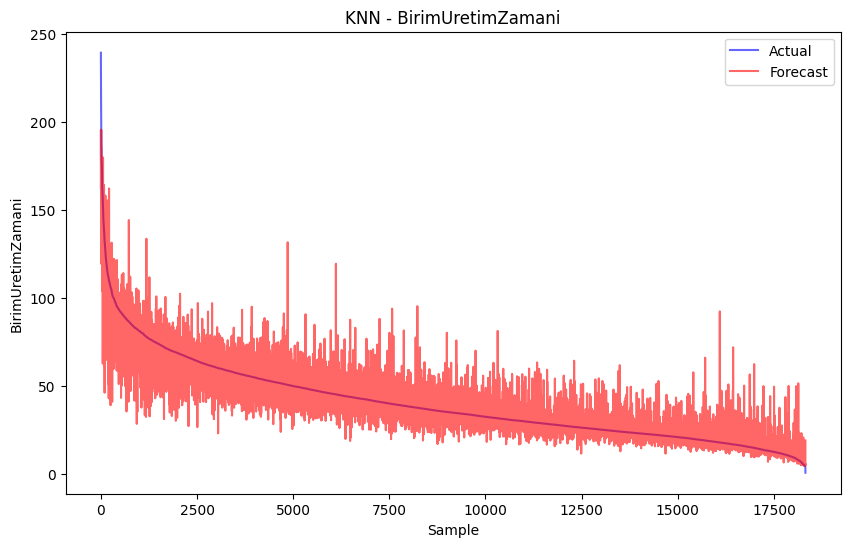

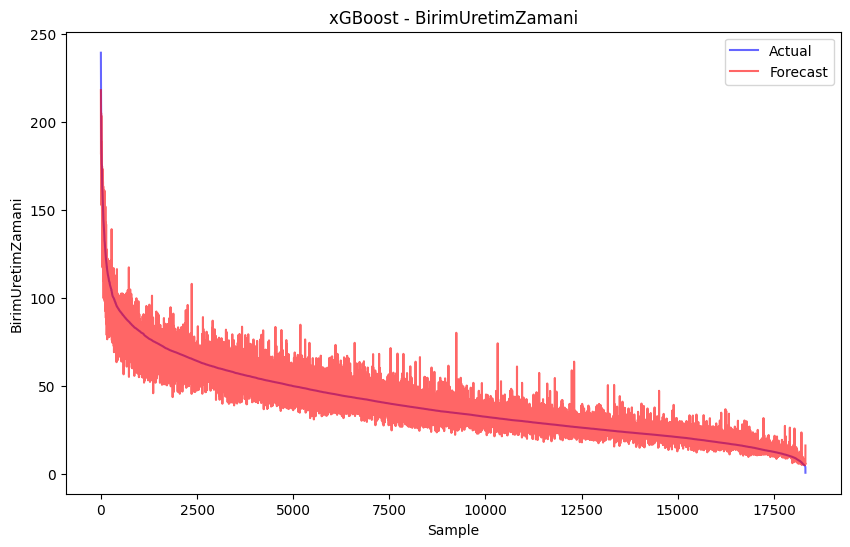

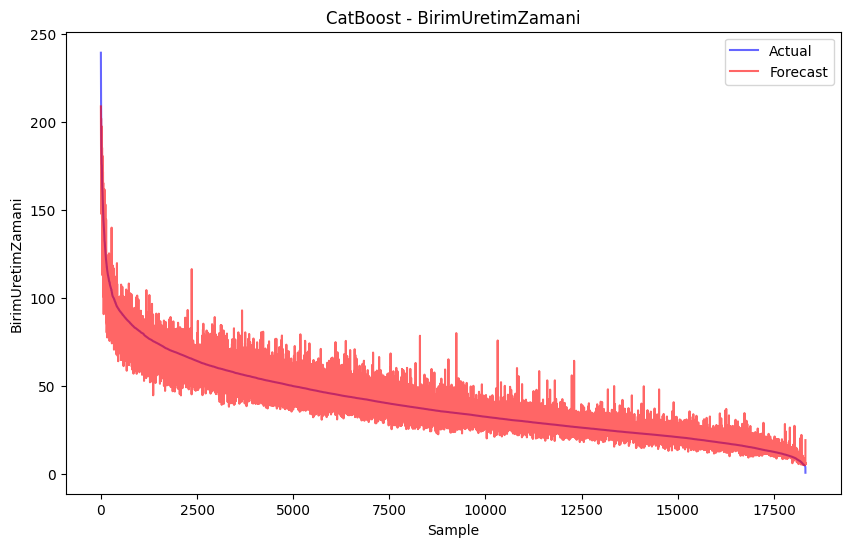

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031707 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 18319, number of used features: 625
[LightGBM] [Info] Start training from score 39.972026


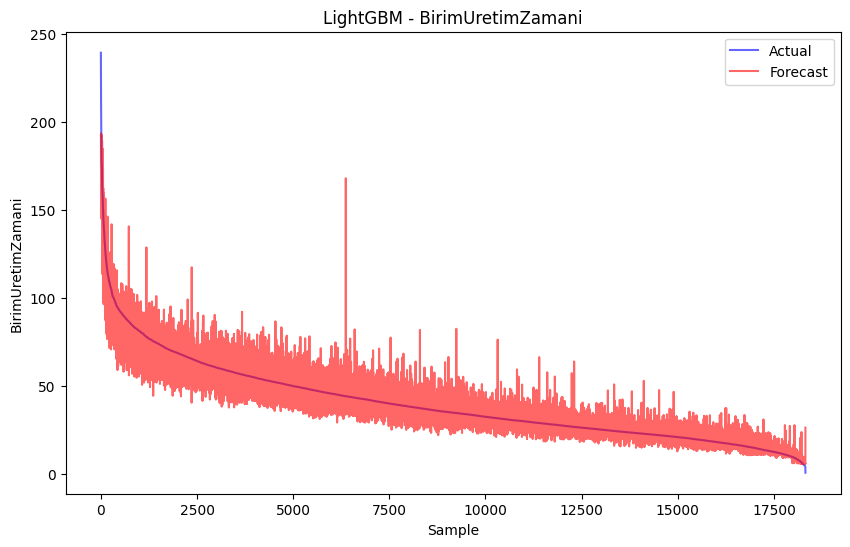

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error
import xgboost as xgb
import catboost as cb
import lightgbm as lgb
import matplotlib.pyplot as plt

# Veriyi yükleyelim
data_path = 'birim_uretim_zamani_duzenlenmis.csv'
data = pd.read_csv(data_path)

# Özellik ve hedef değişkenleri belirleme
# Uretim, Etut, BirimUretimZamani dışındaki kolonlar kategorik kabul ediliyor
X = data[['UretimID', 'ModelAdi', 'PersonelNo', 'ModelTipAdi', 'OperAdi', 'MakinaTipi', 'Uretim','Etut']]
y = data['BirimUretimZamani']  # Hedef değişken

# Kategorik değişkenleri sayısallaştırma (One-hot encoding)
# Uretim ve Etut dışındaki tüm kolonlar için one-hot encoding uyguluyoruz
X = pd.get_dummies(X, columns=['UretimID', 'ModelAdi', 'PersonelNo', 'ModelTipAdi', 'OperAdi', 'MakinaTipi'])

# Veriyi ölçeklendirme (Sadece sayısal özellikleri ölçeklendirelim)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Modelleri tanımlayalım
models = {
    'Random Forest': RandomForestRegressor(random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Elastic Net': ElasticNet(random_state=42),
    'SVR': SVR(),
    'Neural Network': MLPRegressor(random_state=42, max_iter=1000),
    'KNN': KNeighborsRegressor(n_jobs=-1),
    'xGBoost': xgb.XGBRegressor(random_state=42, n_jobs=-1),
    'CatBoost': cb.CatBoostRegressor(random_state=42, silent=True),
    'LightGBM': lgb.LGBMRegressor(random_state=42, n_jobs=-1)
}

# Her model için sonuçları tutmak için boş bir DataFrame
results = pd.DataFrame(columns=['Model', 'MAPE'])

# Tüm modelleri eğitip değerlendiriyoruz
for model_name, model in models.items():
    # Modeli eğit
    model.fit(X_scaled, y)
    
    # Tahmin yap
    y_pred = model.predict(X_scaled)
    
    # MAPE hesaplayalım
    mape = mean_absolute_percentage_error(y, y_pred)
    
    # Sonuçları bir DataFrame olarak oluşturup sonuçlar DataFrame'ine ekleyelim
    result_row = pd.DataFrame({
        'Model': [model_name],
        'MAPE': [mape]
    })
    results = pd.concat([results, result_row], ignore_index=True)

# Sonuçların tablo olarak gösterilmesi
print(results)

# Tüm veriyi kullanarak modelleri eğitip tahminleri yapalım ve grafikleri çizelim
for model_name, model in models.items():
    # Modeli eğit
    model.fit(X_scaled, y)
    
    # Tahmin yap
    y_pred = model.predict(X_scaled)
    
    # Gerçek ve tahmin edilen değerleri çiz
    plt.figure(figsize=(10, 6))
    plt.plot(y.values, label='Actual', color='blue', alpha=0.6)
    plt.plot(y_pred, label='Forecast', color='red', alpha=0.6)
    
    # Grafiğin başlık ve etiketleri
    plt.title(f'{model_name} - BirimUretimZamani')
    plt.xlabel('Sample')
    plt.ylabel('BirimUretimZamani')
    plt.legend()
    plt.show()